In [1]:
# Visualization Part- EDA-Numerical Analysis
# import the libray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# housing data
data=pd.read_csv('housing_data.csv',index_col=0)

In [ ]:
sns.heatmap(df_num.corr(),annot=True,cmap='YlOBr')


In [5]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [7]:
# shape
data.shape

(1460, 80)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
data.isnull().sum().any()

True

In [10]:
data.isnull().sum()[data.isnull().sum()>0]

Electrical      1
GarageYrBlt    81
dtype: int64

In [11]:
# create Numerical features 
df_num=data.select_dtypes(exclude='object')

In [12]:
df_num

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,460,0,40,0,0,0,0,0,2007,175000
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,500,349,0,0,0,0,0,0,2010,210000
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,252,0,60,0,0,0,0,2500,2010,266500
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,240,366,0,112,0,0,0,0,2010,142125


In [13]:
# give list 
list_num=df_num.columns.tolist()

In [14]:
list_num

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [15]:
# create object features 
df_obj=data.select_dtypes(include='object')

In [16]:
# give list 
list_obj=df_obj.columns.tolist()

In [17]:
list_obj

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

# Analysis
1. Univariate Analysis- one variable, dont show any relationship with other var
2. for num data & catg data

In [18]:
# Histogram- Data distribution, in form of bins
list_num

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

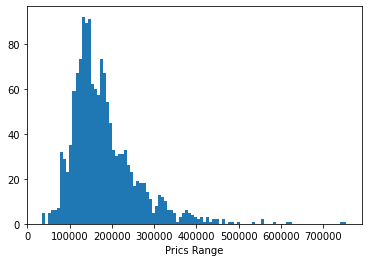

In [24]:
plt.hist(data['SalePrice'],bins=100)
plt.xlabel('Prics Range')
plt.show()

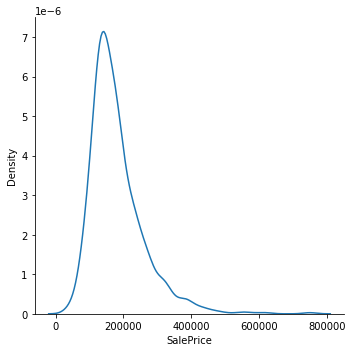

In [28]:
sns.displot(data['SalePrice'],kind="kde") # kernel denstity estimate
plt.show()

<Figure size 720x1080 with 0 Axes>

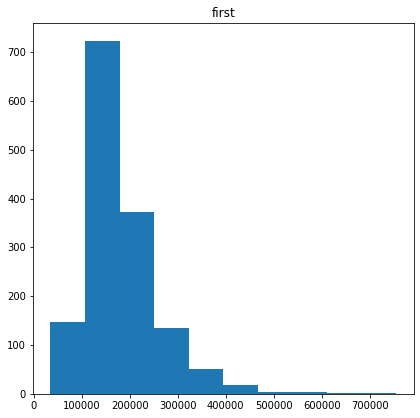

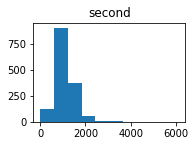

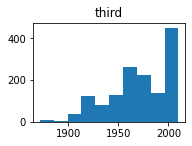

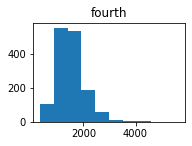

In [40]:
# subplot- to plot mupltiple plots inone otput
# 4 figures
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=0.5,wspace=0.8)
plt.figure(figsize=(15,15))

plt.subplot(221) #2 rows 2 col 321
plt.hist(data['SalePrice']) # kernel denstity estimate
plt.title('first')
plt.show()

plt.subplot(222)
plt.hist(data['TotalBsmtSF'])
plt.title('second')
plt.show()

plt.subplot(223)
plt.hist(data['YearBuilt'])
plt.title('third')
plt.show()

plt.subplot(224)
plt.hist(data['GrLivArea'])
plt.title('fourth')
plt.show()


<AxesSubplot:xlabel='SalePrice'>

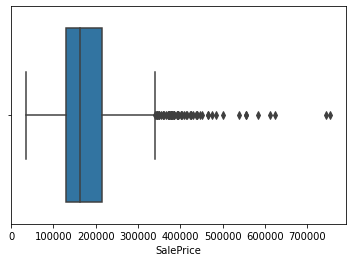

In [44]:
# Boxplot- 5 number summary- Q1, Q2 ,Q3, Lower value & upper value - outlier analysis
sns.boxplot(x=data['SalePrice'])

In [ ]:
lower value=Q1-1.5IOR
upper valur=Q3+1.5IQR

In [46]:
list_obj

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

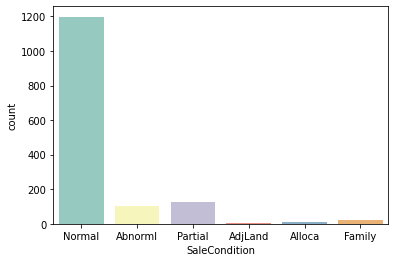

In [50]:
# for categorical variable
# count 
sns.countplot(x=data['SaleCondition'],palette="Set3")

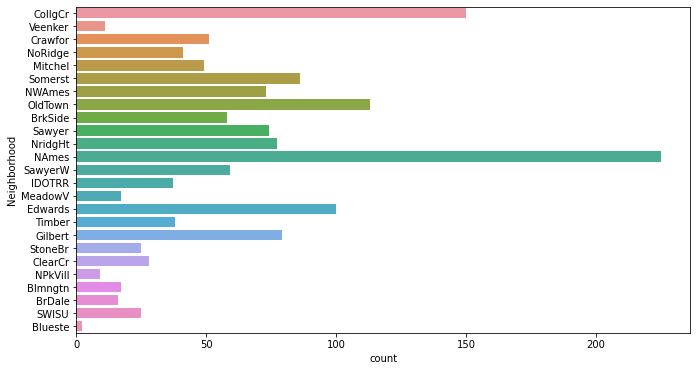

In [53]:
# count 
plt.figure(figsize=(11,6))
sns.countplot(y=data['Neighborhood'])
plt.show()

# Bivariate Analysis

In [54]:
# num vs num
# num vs cat
# categorical vs categorical


In [55]:
list_num

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

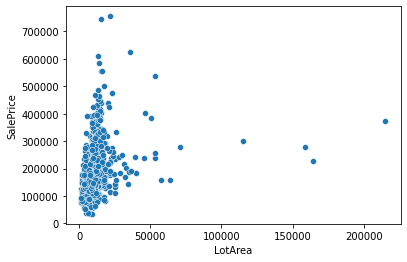

In [57]:
# numeric vs numeric
sns.scatterplot(x='LotArea',y='SalePrice',data=data)

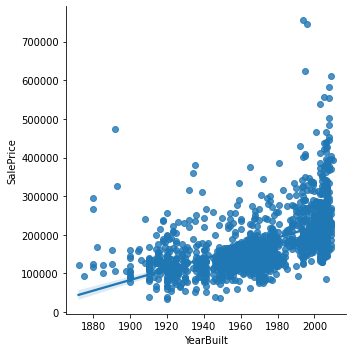

In [61]:
sns.lmplot(x='YearBuilt',y='SalePrice',data=data) # continous variable- price

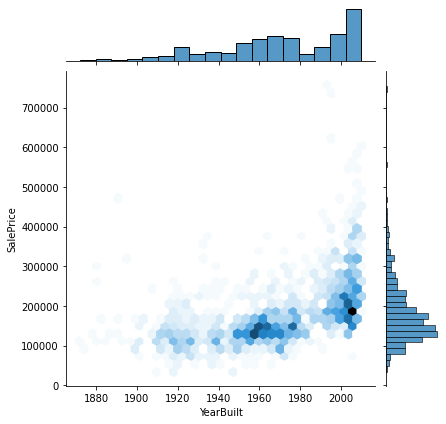

In [62]:
sns.jointplot(x='YearBuilt',y='SalePrice',data=data,kind='hex')

In [63]:
list_obj

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

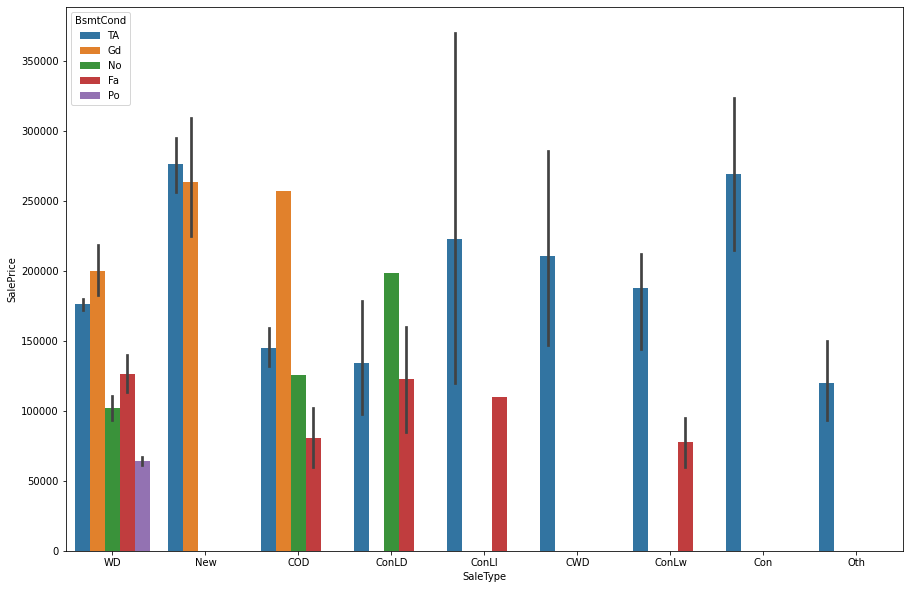

In [69]:
# Catgorical vs numerical
plt.figure(figsize=(15,10))
sns.barplot(x='SaleType',y='SalePrice',data=data,hue='BsmtCond') # error - far from standard dev

In [70]:
# boxplot 
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7f422420fef0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    variab

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

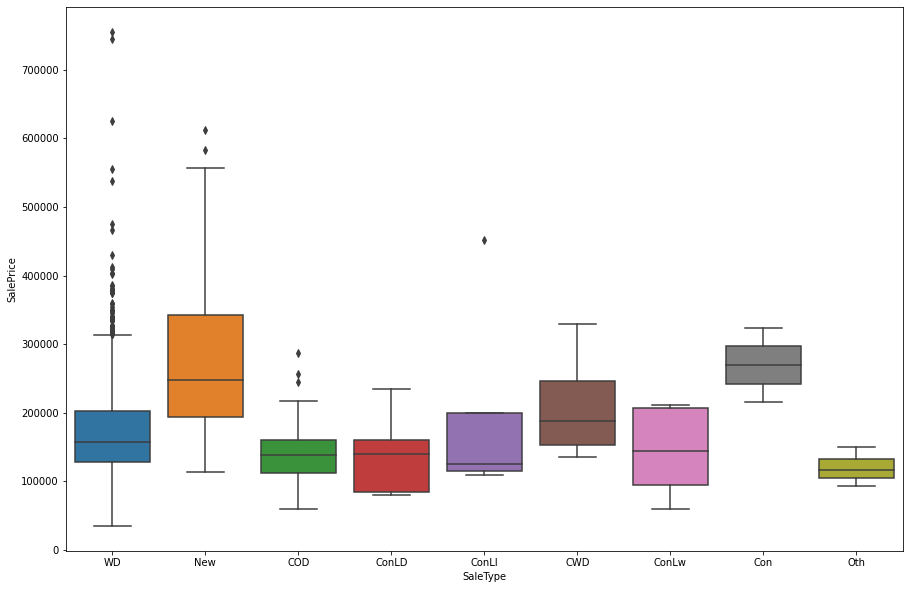

In [71]:
# numeric vs categorical
plt.figure(figsize=(15,10))
sns.boxplot(x='SaleType',y='SalePrice',data=data)

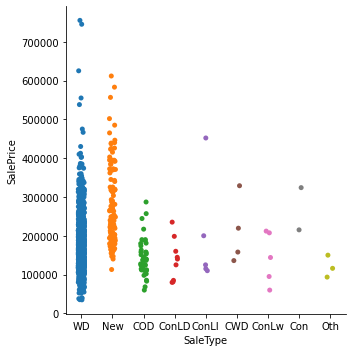

In [72]:
sns.catplot(x='SaleType',y='SalePrice',data=data)

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

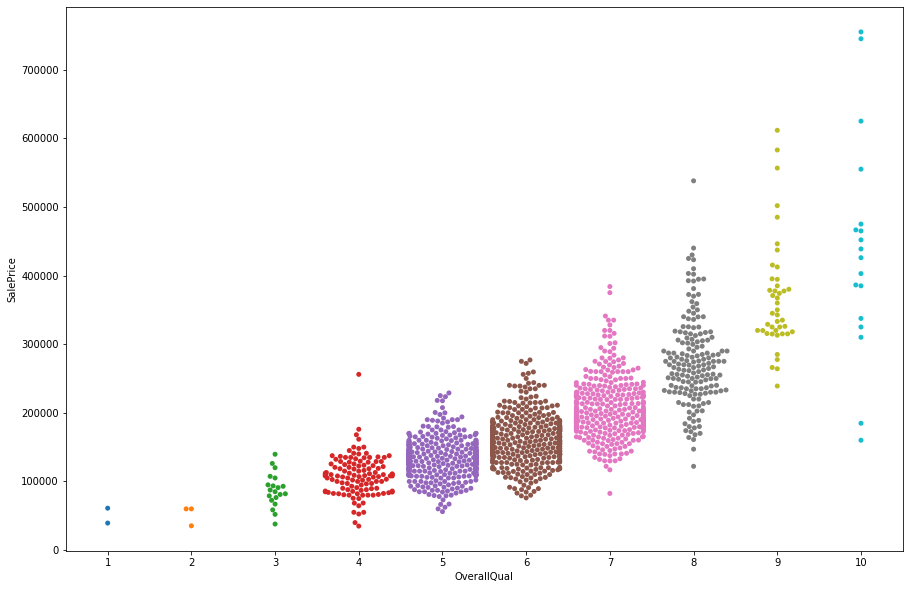

In [78]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='OverallQual',y='SalePrice',data=data)

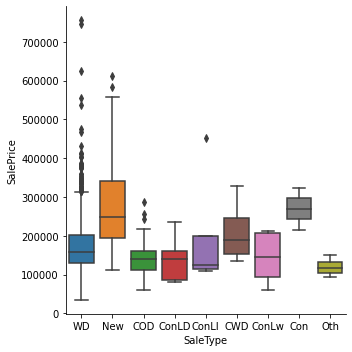

In [79]:
sns.catplot(x='SaleType',y='SalePrice',data=data, kind ='box')


In [80]:
list_obj

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [81]:
# categorical vs categorical
crosstab=pd.crosstab(index=data['Neighborhood'],columns=data['SaleCondition'])
crosstab

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Neighborhood,,,,,,
Blmngtn,0,0,0,0,12,5
Blueste,0,0,0,0,2,0
BrDale,3,0,0,1,12,0
BrkSide,3,0,0,1,54,0
ClearCr,3,0,0,0,24,1
CollgCr,3,0,0,0,129,18
Crawfor,3,0,2,2,43,1
Edwards,8,4,2,0,82,4
Gilbert,1,0,0,2,64,12


<AxesSubplot:xlabel='Neighborhood'>

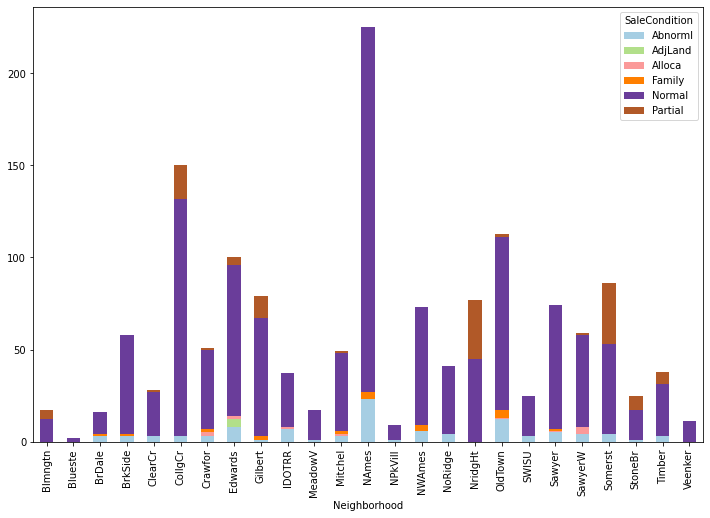

In [84]:
crosstab.plot(kind='bar',figsize=(12,8),stacked=True,colormap='Paired')

<AxesSubplot:>

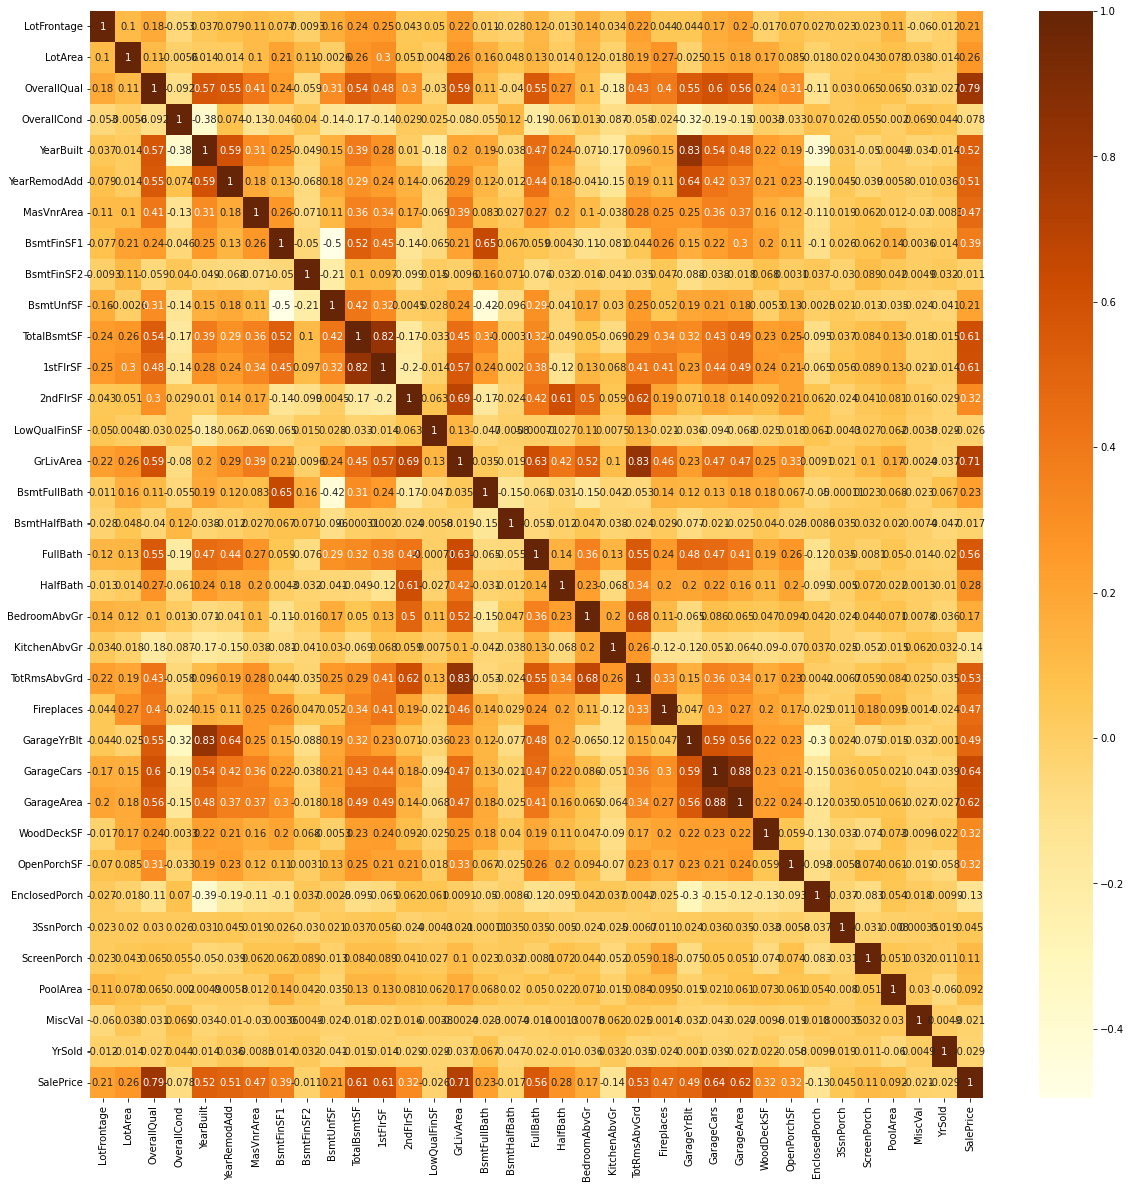

In [93]:
# Multivariate Analysis
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(),annot=True,cmap='YlOrBr')